# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Analysis/Observation
* The temperatures are higher closer to the Equator (at 0° Latitude) and are much lower in the Northern Hemisphere as winter is starting because of high latitudes, 
and therefore receive less direct sunlight in the winter and become colder.
* There's little correlation between humidity and Latitude and cloudiness and Latitude. 
* As for wind Speed and Latitude, wind speeds increase in the upper and lower part on the hemisphere, especially in the north (around 55° to 70° Latitude), and do not go above 10mph within 30° of the Equator.

In [123]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [124]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime
# Import API key
from config import api_key

#from api_keys import weather_api_key
#from config import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [84]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [85]:
response = requests.get(query_url + city).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 47.26, 'lon': 39.87},
 'dt': 1604776122,
 'id': 583673,
 'main': {'feels_like': 4.28,
          'humidity': 87,
          'pressure': 1024,
          'temp': 8,
          'temp_max': 8,
          'temp_min': 8},
 'name': 'Aksay',
 'sys': {'country': 'RU',
         'id': 8971,
         'sunrise': 1604722383,
         'sunset': 1604757325,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 310, 'speed': 4}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [86]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

Processing record 1|freeport
Processing record 2|east london
City not found. skipping.
City not found. skipping.
Processing record 3|hermanus
Processing record 4|busselton
Processing record 5|the valley
Processing record 6|hilo
Processing record 7|port hardy
Processing record 8|tasiilaq
Processing record 9|yarim
Processing record 10|morondava
Processing record 11|mehamn
Processing record 12|luganville
City not found. skipping.
Processing record 13|bluff
Processing record 14|puerto escondido
Processing record 15|westport
Processing record 16|albany
Processing record 17|narsaq
Processing record 18|jamestown
Processing record 19|chuy
Processing record 20|castro
Processing record 21|wukari
Processing record 22|rikitea
City not found. skipping.
Processing record 23|egvekinot
Processing record 24|ushuaia
Processing record 25|new norfolk
Processing record 26|naze
City not found. skipping.
City not found. skipping.
Processing record 27|batagay-alyta
Processing record 28|mataura
Processing reco

Processing record 245|hammerfest
Processing record 246|syracuse
Processing record 247|sioux lookout
Processing record 248|partur
City not found. skipping.
Processing record 249|kaeo
City not found. skipping.
Processing record 250|saint george
Processing record 251|sao joao da barra
City not found. skipping.
Processing record 252|ilulissat
Processing record 253|zhanaozen
City not found. skipping.
Processing record 254|reims
Processing record 255|ziyang
Processing record 256|iranshahr
Processing record 257|mecca
Processing record 258|bubaque
Processing record 259|rincon
Processing record 260|pangnirtung
Processing record 261|pochutla
Processing record 262|wahlstedt
Processing record 263|cascais
Processing record 264|kormilovka
City not found. skipping.
Processing record 265|hambantota
Processing record 266|qiyang
Processing record 267|makakilo city
City not found. skipping.
Processing record 268|homer
Processing record 269|ishigaki
Processing record 270|vardo
Processing record 271|tailai

Processing record 488|doha
Processing record 489|bikaner
Processing record 490|pangai
Processing record 491|avinurme
Processing record 492|samarai
Processing record 493|talnakh
Processing record 494|ndele
Processing record 495|ust-uda
Processing record 496|muzhi
Processing record 497|evora
Processing record 498|tambovka
Processing record 499|krasnoselkup
Processing record 500|jalu
Processing record 501|tizimin
Processing record 502|starchiojd
Processing record 503|kanke
Processing record 504|krasnovka
Processing record 505|vostok
Processing record 506|batemans bay
Processing record 507|houma
Processing record 508|teluk nibung
City not found. skipping.
Processing record 509|kaihua
Processing record 510|tsabong
Processing record 511|tiznit
Processing record 512|cahir
Processing record 513|danville
Processing record 514|calvillo
Processing record 515|tessalit
Processing record 516|hovd
City not found. skipping.
Processing record 517|humaita
Processing record 518|yertsevo
Processing record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [121]:
#Creating city dataframe
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_df = city_df.rename_axis('City ID')

#Exporting data to csv
city_df.to_csv("../output_data/new_df_city_output.csv")
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Freeport,1,US,1604775840,35,40.66,-73.58,73.99,4.70
1,East London,0,ZA,1604775961,83,-33.02,27.91,71.60,9.17
2,Hermanus,0,ZA,1604776125,57,-34.42,19.23,64.99,13.00
3,Busselton,54,AU,1604776126,66,-33.65,115.33,55.00,3.27
4,The Valley,20,AI,1604776126,70,18.22,-63.06,87.80,13.87


In [90]:
city_df.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [151]:
city_df2=city_df.loc[city_df["Humidity"] <= 100,:]
city_df2.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Freeport,1,US,1604775840,35,40.66,-73.58,73.99,4.70
1,East London,0,ZA,1604775961,83,-33.02,27.91,71.60,9.17
2,Hermanus,0,ZA,1604776125,57,-34.42,19.23,64.99,13.00
3,Busselton,54,AU,1604776126,66,-33.65,115.33,55.00,3.27
4,The Valley,20,AI,1604776126,70,18.22,-63.06,87.80,13.87


In [152]:
#  Get the indices of cities that have humidity over 100%.
city_indices_df3=city_df.loc[city_df["Humidity"] > 100,:]
indices=city_indices_df3.index.values
print(city_indices_df3.index.values)

[]


In [127]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_df2.drop(indices, inplace=True)
city_df2

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Freeport,1,US,1604775840,35,40.66,-73.58,73.99,4.70
1,East London,0,ZA,1604775961,83,-33.02,27.91,71.60,9.17
2,Hermanus,0,ZA,1604776125,57,-34.42,19.23,64.99,13.00
3,Busselton,54,AU,1604776126,66,-33.65,115.33,55.00,3.27
4,The Valley,20,AI,1604776126,70,18.22,-63.06,87.80,13.87
...,...,...,...,...,...,...,...,...,...
558,Mount Gambier,0,AU,1604776202,93,-37.83,140.77,41.00,6.93
559,Acapulco de Juárez,5,MX,1604776068,70,16.86,-99.89,86.00,3.36
560,Berlevåg,90,NO,1604776202,80,70.86,29.09,39.20,31.09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

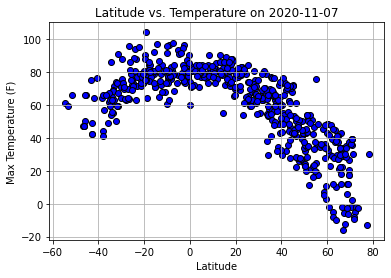

In [128]:
from datetime import datetime

#Creating plot
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Lat_vs_temp_plot")
plt.title(f"Latitude vs. Temperature on {datetime.today().date()}")
# Save Figure
plt.savefig("../output_data/City_Latitude_vs_Max_Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

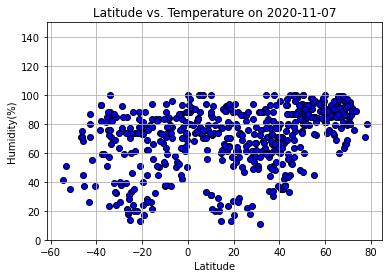

In [129]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.ylim(0, city_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"Latitude vs. Temperature on {datetime.today().date()}")
plt.savefig("Lat_vs_humidity_plot")
# Save Figure
plt.savefig("../output_data/City_Latitude_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

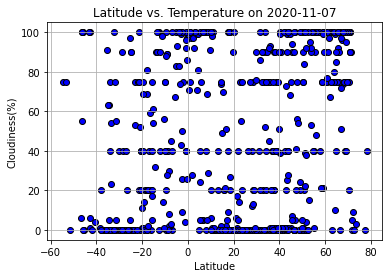

In [130]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"Latitude vs. Temperature on {datetime.today().date()}")
plt.savefig("Lat_vs_cloudiness_plot")
# Save Figure
plt.savefig("../output_data/City_Latitude_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

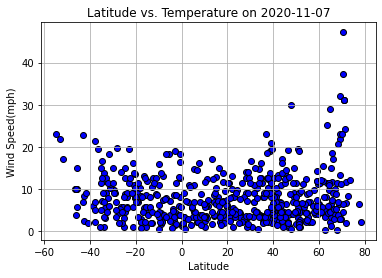

In [131]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"Latitude vs. Temperature on {datetime.today().date()}")
plt.savefig("Lat_vs_windSpeed_plot")
# Save Figure
plt.savefig("../output_data/City_Latitude_vs_Wind_Speed.png")
plt.show()

## Linear Regression

In [141]:
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.845323812064231
None


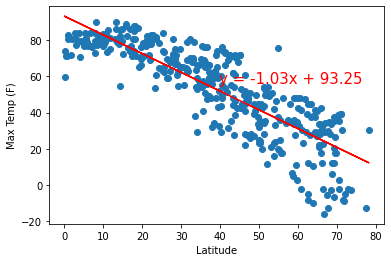

In [143]:
Northern_hemisphere = city_df.loc[city_df["Lat"]>0]
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))
# Save Figure
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6382614374174741
None


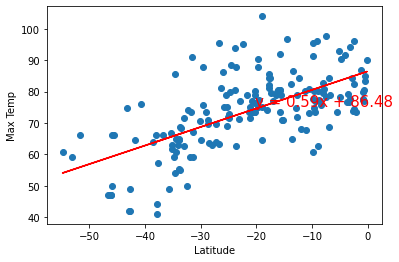

In [144]:
Southern_hemisphere = city_df.loc[city_df["Lat"]<0]
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp")
print(linear_reg_plot(x_values,y_values))
# Save Figure
plt.savefig("../output_data/southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3042839531602262
None


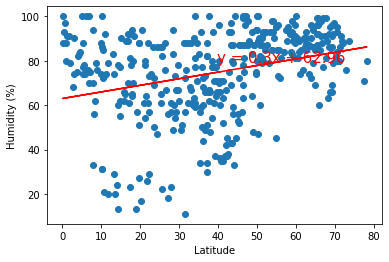

In [145]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))
# Save Figure
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11994254055812338
None


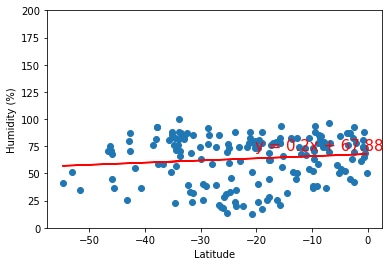

In [146]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))
# Save Figure
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.24552525920458668
None


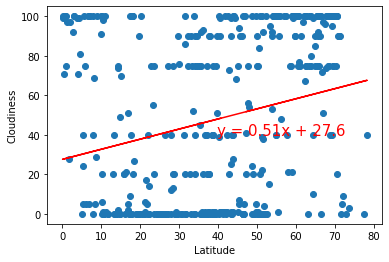

In [147]:

x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))
# Save Figure
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.281410326676649
None


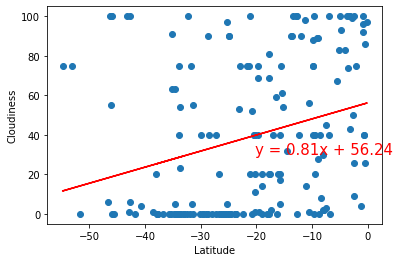

In [148]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))
# Save Figure
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.23646989215029587
None


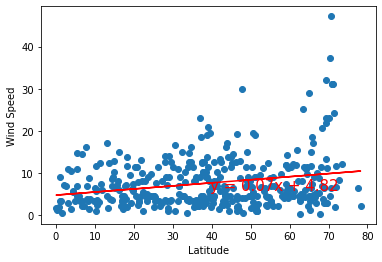

In [149]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))
# Save Figure
plt.savefig("../output_data/Northern Hemisphere - WindSpeed(mph)) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.24045769091079772
None


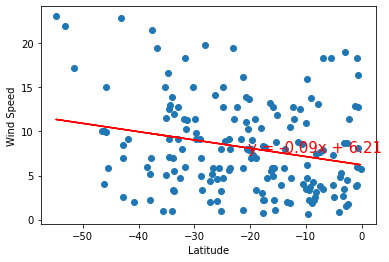

In [150]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))
# Save Figure
plt.savefig("../output_data/Southern Hemisphere - WindSpeed(mph)) vs. Latitude Linear Regression.png")
plt.show()